# SVT: Vary epsilon

In [7]:
import glob
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")


def extract(data, label):
    abstracted_data = []
    for data_ in data.values():
        abstracted_data.append(data_[label])
    return abstracted_data

def plot(y_ax, db, logscale=False):

    data = {}
    for filename in glob.glob('result/*.json'):
        with open(filename) as f:
            data[os.path.split(filename)[1]] = json.load(f)

    float_epsilons = [1, 0.7, 0.5, 0.3, 0.1]
    epsilons = ["1.000000", "0.700000", "0.500000", "0.300000", "0.100000"]
    adaptive_files = []
    onesided_files = []
    for epsilon in epsilons:
        filename = "svt_adaptive_" + db + "_epsilon" + epsilon + f"_k{100}" + ".json" 
        adaptive_files.append(data[filename])
        filename = "svt_onesided_" + db + "_epsilon" + epsilon + f"_k{100}" + ".json" 
        onesided_files.append(data[filename])

    adaptive_errors = [extract(file, y_ax) for file in adaptive_files]
    onesided_errors = [extract(file, y_ax) for file in onesided_files]

    plot_data_adaptive = []
    plot_data_onesided = []
    for float_epsilon, onesided_error, adaptive_error in zip(float_epsilons, onesided_errors, adaptive_errors):
        for onesided_error, adaptive_error in zip(onesided_error, adaptive_error):
            plot_data_adaptive.append([float_epsilon, adaptive_error, "free-gap"])
            plot_data_onesided.append([float_epsilon, onesided_error, "asymmetric"])
    if y_ax == "f_value":
        y_ax = "f1 score"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    elif y_ax == "error":
        y_ax = "the mean squared error"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    else:
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])

    if logscale:
        g = sns.lineplot(x="epsilon", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
        g.set_yscale('log')
    else:
        sns.lineplot(x="epsilon", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
    plt.savefig("imgs/" + "_".join(["svt", db, "epsilon", y_ax]) + ".png", bbox_inches="tight")
    plt.show()

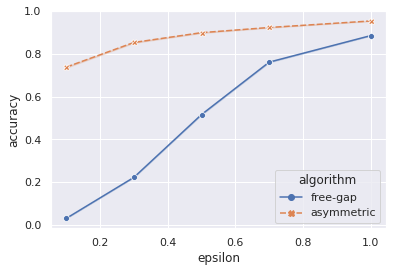

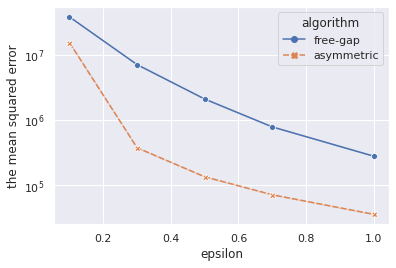

In [8]:
plot("accuracy", "kosarak", False)
plot("error", "kosarak", True)

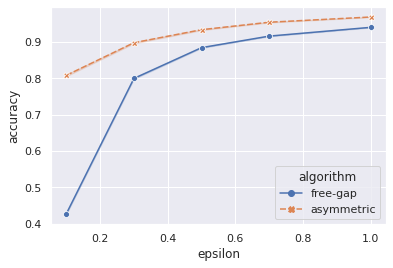

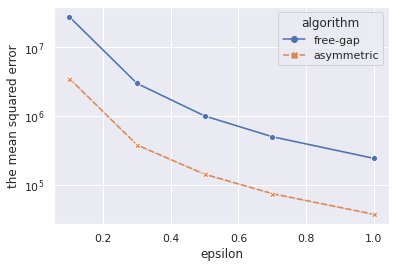

In [9]:
plot("accuracy", "bms_pos", False)
plot("error", "bms_pos", True)

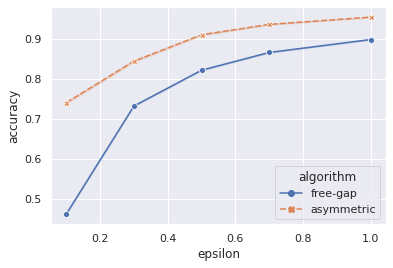

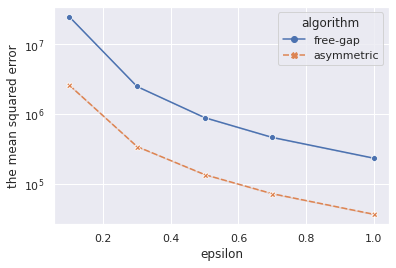

In [10]:
plot("accuracy", "t40", False)
plot("error", "t40", True)

# SVT: Vary k

In [1]:
import glob
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")


def extract(data, label):
    abstracted_data = []
    for data_ in data.values():
        abstracted_data.append(data_[label])
    return abstracted_data

def plot(y_ax, db, logscale=False):

    data = {}
    for filename in glob.glob('result/*.json'):
        with open(filename) as f:
            data[os.path.split(filename)[1]] = json.load(f)

    ks = [10, 50, 100, 200, 500]
    epsilon = "0.500000"
    adaptive_files = []
    onesided_files = []
    for k in ks:
        filename = "svt_adaptive_" + db + "_epsilon" + epsilon + f"_k{k}" + ".json" 
        adaptive_files.append(data[filename])
        filename = "svt_onesided_" + db + "_epsilon" + epsilon + f"_k{k}" + ".json" 
        onesided_files.append(data[filename])

    adaptive_errors = [extract(file, y_ax) for file in adaptive_files]
    onesided_errors = [extract(file, y_ax) for file in onesided_files]

    plot_data_adaptive = []
    plot_data_onesided = []
    for k, onesided_error, adaptive_error in zip(ks, onesided_errors, adaptive_errors):
        for onesided_error, adaptive_error in zip(onesided_error, adaptive_error):
            plot_data_adaptive.append([k, adaptive_error, "free-gap"])
            plot_data_onesided.append([k, onesided_error, "asymmetric"])
    if y_ax == "f_value":
        y_ax = "f1 score"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    elif y_ax == "error":
        y_ax = "the mean squared error"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    else:
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])

    if logscale:
        g = sns.lineplot(x="k", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
        g.set_yscale('log')
    else:
        sns.lineplot(x="k", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
    plt.savefig("imgs/" + "_".join(["svt", db, "k", y_ax]) + ".png", bbox_inches="tight")
    plt.show()

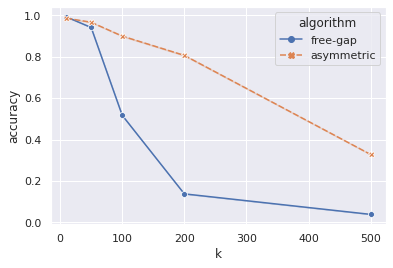

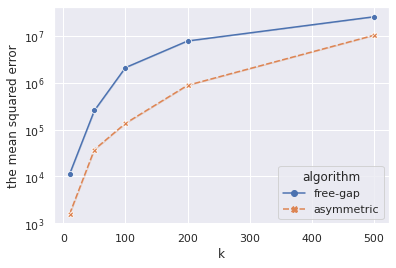

In [2]:
plot("accuracy", "kosarak", False)
plot("error", "kosarak", True)

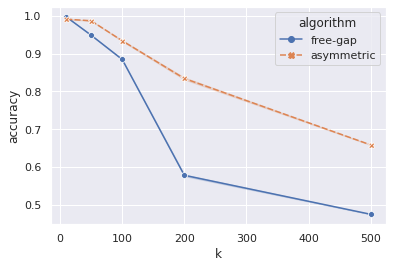

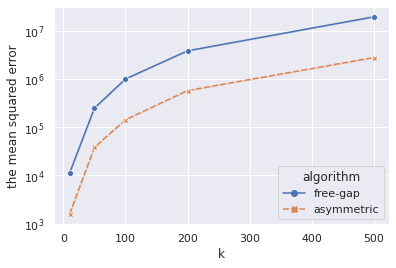

In [5]:
plot("accuracy", "bms_pos", False)
plot("error", "bms_pos", True)

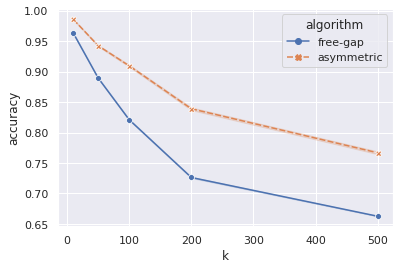

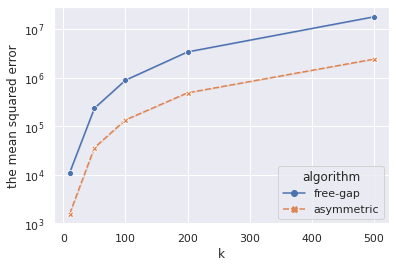

In [6]:
plot("accuracy", "t40", False)
plot("error", "t40", True)

# RNM Vary epsilon

In [12]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def extract(data, label):
    abstracted_data = []
    for data_ in data.values():
        abstracted_data.append(data_[label])
    return abstracted_data

def plot(y_ax, db, logscale=False):

    data = {}
    for filename in glob.glob('result/*.json'):
        with open(filename) as f:
            data[os.path.split(filename)[1]] = json.load(f)

    float_epsilons = [1, 0.7, 0.5, 0.3, 0.1]
    epsilons = ["1.000000", "0.700000", "0.500000", "0.300000", "0.100000"]
    adaptive_files = []
    onesided_files = []
    for epsilon in epsilons:
        filename = "rnam_adaptive_" + db + "_epsilon" + epsilon + ".json" 
        adaptive_files.append(data[filename])
        filename = "rnam_onesided_" + db + "_epsilon" + epsilon + ".json" 
        onesided_files.append(data[filename])

    adaptive_errors = [extract(file, y_ax) for file in adaptive_files]
    onesided_errors = [extract(file, y_ax) for file in onesided_files]

    plot_data_adaptive = []
    plot_data_onesided = []
    for float_epsilon, onesided_error, adaptive_error in zip(float_epsilons, onesided_errors, adaptive_errors):
        for onesided_error, adaptive_error in zip(onesided_error, adaptive_error):
            plot_data_adaptive.append([float_epsilon, adaptive_error, "free-gap"])
            plot_data_onesided.append([float_epsilon, onesided_error, "asymmetric"])
    if y_ax == "f_value":
        y_ax = "f1 score"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    elif y_ax == "error":
        y_ax = "the mean squared error"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    else:
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["epsilon", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["epsilon", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])

    if logscale:
        g = sns.lineplot(x="epsilon", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
        g.set_yscale('log')
    else:
        sns.lineplot(x="epsilon", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
    plt.savefig("imgs/" + "_".join([db, "epsilon", y_ax]), bbox_inches="tight")
    plt.show()

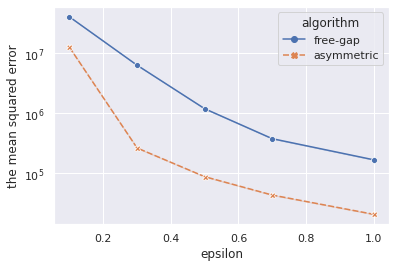

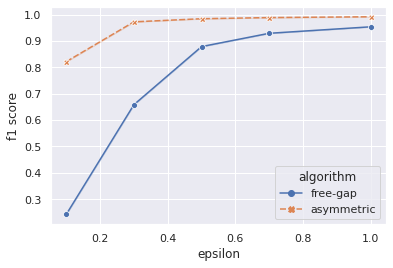

In [13]:
plot("error", "kosarak", True)
plot("f_value", "kosarak", False)

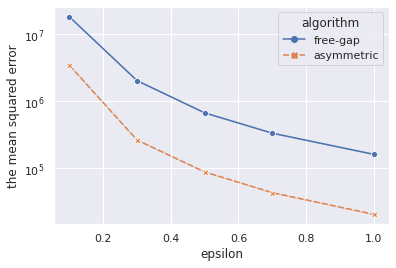

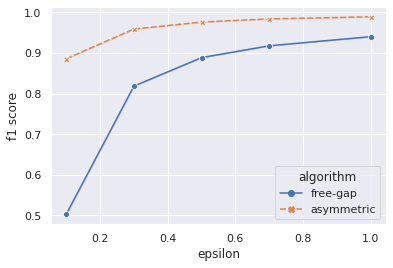

In [14]:
plot("error", "t40", True)
plot("f_value", "t40", False)

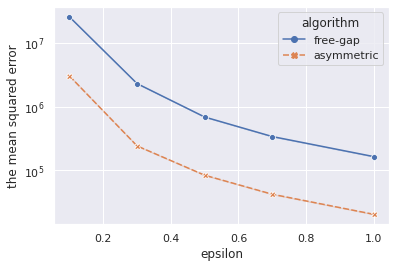

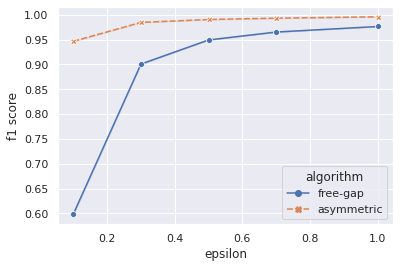

In [15]:
plot("error", "bms_pos", True)
plot("f_value", "bms_pos", False)

# RNM: Vary k

In [16]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def extract(data, label):
    abstracted_data = []
    for data_ in data.values():
        abstracted_data.append(data_[label])
    return abstracted_data

def plot(y_ax, db, logscale=False):

    data = {}
    for filename in glob.glob('result/*.json'):
        with open(filename) as f:
            data[os.path.split(filename)[1]] = json.load(f)

    ks = [10, 50, 200, 500]
    epsilon = "0.500000"
    adaptive_files = []
    onesided_files = []
    for k in ks:
        filename = "rnam_adaptive_" + db + "_epsilon" + epsilon + f"_k{k}" + ".json" 
        adaptive_files.append(data[filename])
        filename = "rnam_onesided_" + db + "_epsilon" + epsilon + f"_k{k}" + ".json" 
        onesided_files.append(data[filename])

    adaptive_errors = [extract(file, y_ax) for file in adaptive_files]
    onesided_errors = [extract(file, y_ax) for file in onesided_files]

    plot_data_adaptive = []
    plot_data_onesided = []
    for k, onesided_error, adaptive_error in zip(ks, onesided_errors, adaptive_errors):
        for onesided_error, adaptive_error in zip(onesided_error, adaptive_error):
            plot_data_adaptive.append([k, adaptive_error, "free-gap"])
            plot_data_onesided.append([k, onesided_error, "asymmetric"])
    if y_ax == "f_value":
        y_ax = "f1 score"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    elif y_ax == "error":
        y_ax = "the mean squared error"
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    else:
        plot_data_adaptive = pd.DataFrame(plot_data_adaptive, columns=["k", y_ax, "algorithm"])
        plot_data_onesided = pd.DataFrame(plot_data_onesided, columns=["k", y_ax, "algorithm"])
        plot_data = pd.concat([plot_data_adaptive, plot_data_onesided])
    
    if logscale:
        g = sns.lineplot(x="k", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
        g.set_yscale('log')
    else:
        sns.lineplot(x="k", y=y_ax, hue="algorithm", data=plot_data, style="algorithm", markers=True)
    plt.savefig("imgs/" + "_".join([db, "k", y_ax]), bbox_inches="tight")
    plt.show()

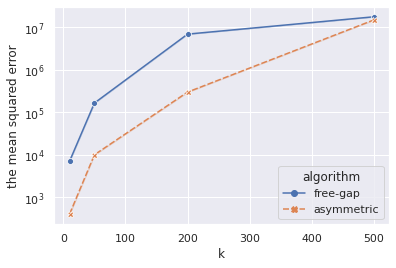

KeyError: 'f1_value'

In [19]:
plot("error", "kosarak", True)
plot("f1_value", "kosarak", False)

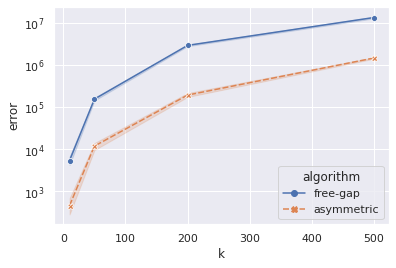

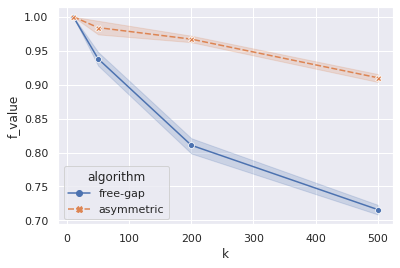

In [6]:
plot("error", "t40", True)
plot("f_value", "t40", False)

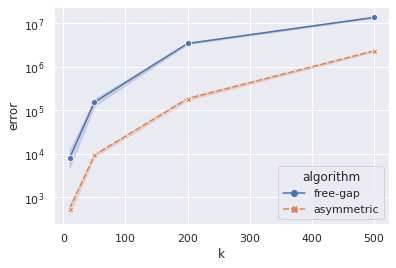

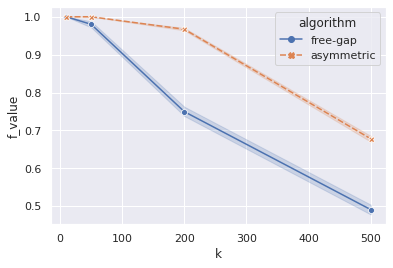

In [7]:
plot("error", "bms_pos", True)
plot("f_value", "bms_pos", False)